# 🚀 Week 02: Training Machine Learning Models 🎯  

This week, we dive deeper into **Machine Learning** by learning how to **train models** for different types of problems, including **classification** and **prediction** tasks. 🧠💡  

### What You’ll Learn:  
🔹 How to **train models** using real-world data.  
🔹 The role of **features** in improving predictions.  
🔹 How to **evaluate model performance** and fine-tune it.  
🔹 The impact of **hyperparameters** like learning rate and epochs.  

By the end of this week, you'll be able to build, train, and test models confidently. Get ready to experiment, analyze, and improve your models! 🚀🔥

## Exercise 01 : **Predicting Trip Fare using Linear Regression**  
---

### **Objective**  
The goal of this task is to build a machine learning model that predicts the fare price of a trip based on selected features. You will go through the full machine learning workflow, including data preprocessing, model training, evaluation, and visualization.  

### **Tasks Overview**  

Follow these steps to train and evaluate a machine learning model:  

1. **Load and Explore the Data** 📝  
2. **Prepare the Data** 🔧  
3. **Train the Model** 🎯  
4. **Make Predictions** 🔮  
5. **Evaluate the Model** 📊  

### **Resources**  
[A Visual Introduction To (Almost) Everything You Should Know](https://mlu-explain.github.io/linear-regression/)

---

###1.Load and Explore the Data 📝

Load the dataset using pandas and inspect its structure.
Check for missing values and basic statistics.
Visualize key features to understand their relationship with the target variable.

In [9]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
from    selenium.webdriver.chrome.service import Service
from    selenium.webdriver.chrome.options import Options
from    webdriver_manager.chrome import ChromeDriverManager
from    bs4 import BeautifulSoup
from    selenium import webdriver
import  requests
import  sys

In [10]:
data_url = "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
data = pd.read_csv(data_url)
data.head(10)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
5,05/17/2022 5:30:00 PM,05/17/2022 6:00:00 PM,17.50,1251,1.38,4.0,1.703108e+10,1.703128e+10,8.0,28.0,11.00,3.00,27.3,0.0,0.0,14.50,Credit Card,Flash Cab
6,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1813,2.00,4.0,1.703108e+10,1.703128e+10,8.0,28.0,14.50,0.00,0.0,0.0,0.0,14.50,Cash,Sun Taxi
7,05/17/2022 5:30:00 PM,05/17/2022 6:00:00 PM,17.50,1857,2.05,4.0,1.703108e+10,1.703128e+10,8.0,28.0,14.75,4.19,25.8,0.0,1.5,20.94,Credit Card,Sun Taxi
8,05/17/2022 7:00:00 PM,05/17/2022 7:00:00 PM,19.00,787,0.87,4.0,1.703108e+10,1.703108e+10,8.0,8.0,8.00,0.00,0.0,0.0,1.5,9.50,Cash,City Service
9,05/16/2022 6:30:00 PM,05/16/2022 6:45:00 PM,18.50,1399,1.55,4.0,NaN,NaN,32.0,6.0,17.88,4.11,23.0,0.0,0.0,21.99,Mobile,Flash Cab


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

### 2.Prepare the Data 🔧  
   - Select the most relevant features for training.  
   - Handle missing values if needed.  
   - Normalize or scale the data to improve performance if needed
   - Split the dataset into **training (80%)** and **testing (20%)** sets.  

>🙋 **Why we need to split our dataset**❓

In [12]:
tmp = data
# tmp.T
tmp.head().T

,0,1,2,3,4
TRIP_START_TIMESTAMP,05/17/2022 7:15:00 AM,05/17/2022 5:15:00 PM,05/17/2022 5:15:00 PM,05/17/2022 6:00:00 PM,05/17/2022 5:00:00 PM
TRIP_END_TIMESTAMP,05/17/2022 7:45:00 AM,05/17/2022 5:30:00 PM,05/17/2022 5:30:00 PM,05/17/2022 7:00:00 PM,05/17/2022 5:30:00 PM
TRIP_START_HOUR,7.25,17.25,17.25,18.0,17.0
TRIP_SECONDS,2341,1074,1173,3360,1044
TRIP_MILES,2.57,1.18,1.29,3.7,1.15
TRIP_SPEED,4.0,4.0,4.0,4.0,4.0
PICKUP_CENSUS_TRACT,NaN,NaN,17031320100.0,17031320100.0,17031320100.0
DROPOFF_CENSUS_TRACT,NaN,17031081202.0,17031081201.0,17031241400.0,17031081800.0
PICKUP_COMMUNITY_AREA,NaN,NaN,32.0,32.0,32.0
DROPOFF_COMMUNITY_AREA,17.0,8.0,8.0,24.0,8.0


In [13]:
print(tmp['PICKUP_CENSUS_TRACT'].isna().sum())
print(tmp['DROPOFF_CENSUS_TRACT'].isna().sum())
print(tmp['PICKUP_COMMUNITY_AREA'].isna().sum())
print(tmp['DROPOFF_COMMUNITY_AREA'].isna().sum())

18435
17671
3217
3495


In [14]:
data.columns

Index(['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_START_HOUR',
       'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'PICKUP_CENSUS_TRACT',
       'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')

- feature i choose to keep:
   
TRIP_START_TIMESTAMP\
TRIP_END_TIMESTAMP\
TRIP_MILES\
PICKUP_COMMUNITY_AREA\
DROPOFF_COMMUNITY_AREA\
FARE\
TIPS\
TIP_RATE\
TOLLS\
EXTRAS\
TRIP_TOTAL\
PAYMENT_TYPE\
COMPANY

In [15]:
tmp.drop("TRIP_START_HOUR", axis='columns', inplace=True)
tmp.drop("TRIP_SECONDS", axis='columns', inplace=True)
tmp.drop("TRIP_SPEED", axis='columns', inplace=True)
tmp.drop("PICKUP_CENSUS_TRACT", axis='columns', inplace=True)
tmp.drop("DROPOFF_CENSUS_TRACT", axis='columns', inplace=True)

In [16]:
data.columns

Index(['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_MILES',
       'PICKUP_COMMUNITY_AREA', 'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS',
       'TIP_RATE', 'TOLLS', 'EXTRAS', 'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')

#### Handle missing values

In [17]:
data['PICKUP_COMMUNITY_AREA'] = data['PICKUP_COMMUNITY_AREA'].fillna(data['PICKUP_COMMUNITY_AREA'].mode().iloc[0])
data['DROPOFF_COMMUNITY_AREA'] = data['DROPOFF_COMMUNITY_AREA'].fillna(data['DROPOFF_COMMUNITY_AREA'].mode().iloc[0])
data.isna().sum()

TRIP_START_TIMESTAMP      0
TRIP_END_TIMESTAMP        0
TRIP_MILES                0
PICKUP_COMMUNITY_AREA     0
DROPOFF_COMMUNITY_AREA    0
FARE                      0
TIPS                      0
TIP_RATE                  0
TOLLS                     0
EXTRAS                    0
TRIP_TOTAL                0
PAYMENT_TYPE              0
COMPANY                   0
dtype: int64

### feature engineering

### Starting with a small core set of engineered features

- Trip time of day (categorical: morning/afternoon/evening/night)
- Trip duration in minutes
- Distance/time ratio (efficiency of the route)
- Day type (weekday/weekend)
- Payment method (binary: cash or card)
- Fare per mile (FARE / TRIP_MILES)
- Fare per minute (FARE / (TRIP_SECONDS/60))
- Has_tip (1 if TIPS > 0)
- Has_tolls (1 if TOLLS > 0)
- Has_extras (1 if EXTRAS > 0)

In [18]:
tmp['TRIP_START_TIMESTAMP'] = pd.to_datetime(tmp['TRIP_START_TIMESTAMP'], format='%m/%d/%Y %I:%M:%S %p')
tmp['TRIP_END_TIMESTAMP'] = pd.to_datetime(tmp['TRIP_END_TIMESTAMP'], format='%m/%d/%Y %I:%M:%S %p')
tmp.head(10).T[:2]

,0,1,2,3,4,5,6,7,8,9
TRIP_START_TIMESTAMP,2022-05-17 07:15:00,2022-05-17 17:15:00,2022-05-17 17:15:00,2022-05-17 18:00:00,2022-05-17 17:00:00,2022-05-17 17:30:00,2022-05-17 17:00:00,2022-05-17 17:30:00,2022-05-17 19:00:00,2022-05-16 18:30:00
TRIP_END_TIMESTAMP,2022-05-17 07:45:00,2022-05-17 17:30:00,2022-05-17 17:30:00,2022-05-17 19:00:00,2022-05-17 17:30:00,2022-05-17 18:00:00,2022-05-17 17:30:00,2022-05-17 18:00:00,2022-05-17 19:00:00,2022-05-16 18:45:00


In [19]:
def get_time_of_day(dt):
    hour = dt.hour
    if (hour > 4) and (hour <= 12):
        return 'morning'
    elif (hour > 12) and (hour <= 16):
        return 'afternoon'
    elif (hour > 16) and (hour <= 20):
        return 'evening'
    else:
        return 'night'

In [20]:
trip_time_of_day = tmp['TRIP_START_TIMESTAMP'].apply(get_time_of_day)
trip_time_of_day[:5]

0    morning
1    evening
2    evening
3    evening
4    evening
Name: TRIP_START_TIMESTAMP, dtype: object

In [21]:
# trip_duration_min = (tmp['TRIP_END_TIMESTAMP'] - tmp['TRIP_START_TIMESTAMP']).dt.total_seconds() / 60
trip_duration_min = (
    (tmp['TRIP_END_TIMESTAMP'] - tmp['TRIP_START_TIMESTAMP']).dt.total_seconds() / 60
).where(
    (tmp['TRIP_END_TIMESTAMP'] - tmp['TRIP_START_TIMESTAMP']).dt.total_seconds() / 60 != 0,
    tmp['TRIP_MILES']
)
trip_duration_min[:5]

0    30.0
1    15.0
2    15.0
3    60.0
4    30.0
dtype: float64

In [22]:
trip_duration_min.value_counts()

15.00    12619
30.00     7960
45.00     3741
60.00     1290
75.00      202
         ...  
3.76         1
4.38         1
3.75         1
5.94         1
14.60        1
Name: count, Length: 515, dtype: int64

In [23]:
time_ratio_mph = tmp['TRIP_MILES'] / (trip_duration_min / 60)
time_ratio_mph[:5]

0    5.14
1    4.72
2    5.16
3    3.70
4    2.30
dtype: float64

In [24]:
day_type = tmp['TRIP_START_TIMESTAMP'].dt.strftime('%A')
day_type[:5]

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: TRIP_START_TIMESTAMP, dtype: object

In [25]:
tmp['PAYMENT_TYPE'].value_counts()

PAYMENT_TYPE
Credit Card    14142
Cash            8770
Mobile          4041
Prcard          3504
Unknown         1206
No Charge         16
Dispute           15
Name: count, dtype: int64

In [26]:
def categorize_payment(payment_type):
    if payment_type in ['Credit Card', 'Prcard', 'Mobile']:
        return 'Electronic'
    elif payment_type == 'Cash':
        return 'Cash'
    else:
        return 'Other'

In [27]:
payment_method = tmp['PAYMENT_TYPE'].apply(categorize_payment)
payment_method[:5]

0    Electronic
1    Electronic
2          Cash
3          Cash
4          Cash
Name: PAYMENT_TYPE, dtype: object

In [29]:
fare_per_mile = data['FARE'] / data['TRIP_MILES']
fare_per_mile[:5]

0    12.447471
1     8.262712
2     7.945736
3     6.418919
4     8.695652
dtype: float64

In [30]:
fare_per_minute = data['FARE'] / trip_duration_min
fare_per_minute[:5]

0    1.066333
1    0.650000
2    0.683333
3    0.395833
4    0.333333
dtype: float64

In [31]:
has_tip = (data['TIPS'] > 0).astype(int)
has_tip[:5]

0    1
1    1
2    0
3    0
4    0
Name: TIPS, dtype: int64

In [32]:
has_tolls = (data['TOLLS'] > 0).astype(int)
has_tolls[:5]

0    0
1    0
2    0
3    0
4    0
Name: TOLLS, dtype: int64

In [33]:
has_extras = (data['EXTRAS'] > 0).astype(int)
has_extras[:5]

0    0
1    1
2    0
3    1
4    0
Name: EXTRAS, dtype: int64

In [34]:
new_data = pd.DataFrame()
new_data['TRIP_TIME_OF_DAY']        = trip_time_of_day
new_data['TRIP_DURATION_MIN']       = trip_duration_min
new_data['TIME_RATIO_MPH']          = time_ratio_mph
new_data['DAY_TYPE']                = day_type
new_data['PAYMENT_TYPE']            = payment_method
new_data['FARE_PER_MILE']           = fare_per_mile
new_data['FARE_PER_MIN']            = fare_per_minute
new_data['HAS_TIP']                 = has_tip
new_data['HAS_TOLLS']               = has_tolls
new_data['HAS_EXTRAS']              = has_extras
new_data['PICKUP_COMMUNITY_AREA']   = data['PICKUP_COMMUNITY_AREA']
new_data['DROPOFF_COMMUNITY_AREA']  = data['DROPOFF_COMMUNITY_AREA']
new_data['COMPANY']                 = data['COMPANY']
new_data['FARE']                    = data['FARE']

new_data.head(10)

,TRIP_TIME_OF_DAY,TRIP_DURATION_MIN,TIME_RATIO_MPH,DAY_TYPE,PAYMENT_TYPE,FARE_PER_MILE,FARE_PER_MIN,HAS_TIP,HAS_TOLLS,HAS_EXTRAS,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,COMPANY,FARE
0,morning,30.00,5.14,Tuesday,Electronic,12.447471,1.066333,1,0,0,8.0,17.0,Flash Cab,31.99
1,evening,15.00,4.72,Tuesday,Electronic,8.262712,0.650000,1,0,1,8.0,8.0,Flash Cab,9.75
2,evening,15.00,5.16,Tuesday,Cash,7.945736,0.683333,0,0,0,32.0,8.0,Sun Taxi,10.25
3,evening,60.00,3.70,Tuesday,Cash,6.418919,0.395833,0,0,1,32.0,24.0,Choice Taxi Association,23.75
4,evening,30.00,2.30,Tuesday,Cash,8.695652,0.333333,0,0,0,32.0,8.0,Flash Cab,10.00
5,evening,30.00,2.76,Tuesday,Electronic,7.971014,0.366667,1,0,0,8.0,28.0,Flash Cab,11.00
6,evening,30.00,4.00,Tuesday,Cash,7.250000,0.483333,0,0,0,8.0,28.0,Sun Taxi,14.50
7,evening,30.00,4.10,Tuesday,Electronic,7.195122,0.491667,1,0,1,8.0,28.0,Sun Taxi,14.75
8,evening,0.87,60.00,Tuesday,Cash,9.195402,9.195402,0,0,1,8.0,8.0,City Service,8.00
9,evening,15.00,6.20,Monday,Electronic,11.535484,1.192000,1,0,0,32.0,6.0,Flash Cab,17.88


In [35]:
new_data['COMPANY'].value_counts()

COMPANY
Flash Cab                               7887
Taxi Affiliation Services               4371
Sun Taxi                                4024
City Service                            3199
Chicago Independents                    1800
Medallion Leasin                        1390
Taxicab Insurance Agency, LLC           1365
Globe Taxi                              1309
Taxicab Insurance Agency Llc            1167
Star North Taxi Management Llc          1096
Blue Ribbon Taxi Association             919
Choice Taxi Association                  752
Top Cab Affiliation                      721
24 Seven Taxi                            708
U Taxicab                                424
Patriot Taxi Dba Peace Taxi Associat     131
Chicago Taxicab                          128
Koam Taxi Association                     43
312 Medallion Management Corp             40
Blue Ribbon Taxi Association Inc.         39
Petani Cab Corp                           39
KOAM Taxi Association                     28
Me

let's just drop `COMPANY` for now

In [36]:
new_data.drop("COMPANY", axis='columns', inplace=True)

In [37]:
i = 0
for col in new_data:
    if new_data[col].dtype == object:
        print(new_data[col].value_counts())
    else:
        i += 1
print(i)

TRIP_TIME_OF_DAY
morning      11056
afternoon     8596
evening       7804
night         4238
Name: count, dtype: int64
DAY_TYPE
Tuesday      16212
Monday       14825
Wednesday      657
Name: count, dtype: int64
PAYMENT_TYPE
Electronic    21687
Cash           8770
Other          1237
Name: count, dtype: int64
10


In [38]:
new_data.head().T

,0,1,2,3,4
TRIP_TIME_OF_DAY,morning,evening,evening,evening,evening
TRIP_DURATION_MIN,30.0,15.0,15.0,60.0,30.0
TIME_RATIO_MPH,5.14,4.72,5.16,3.7,2.3
DAY_TYPE,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday
PAYMENT_TYPE,Electronic,Electronic,Cash,Cash,Cash
FARE_PER_MILE,12.447471,8.262712,7.945736,6.418919,8.695652
FARE_PER_MIN,1.066333,0.65,0.683333,0.395833,0.333333
HAS_TIP,1,1,0,0,0
HAS_TOLLS,0,0,0,0,0
HAS_EXTRAS,0,1,0,1,0


In [32]:
import seaborn as sb
dataplot = sb.heatmap(new_data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

NameError: name 'new_data' is not defined

In [40]:
new_data.drop("FARE_PER_MIN", axis='columns', inplace=True)
new_data.drop("HAS_TOLLS", axis='columns', inplace=True)
new_data.drop("TIME_RATIO_MPH", axis='columns', inplace=True)

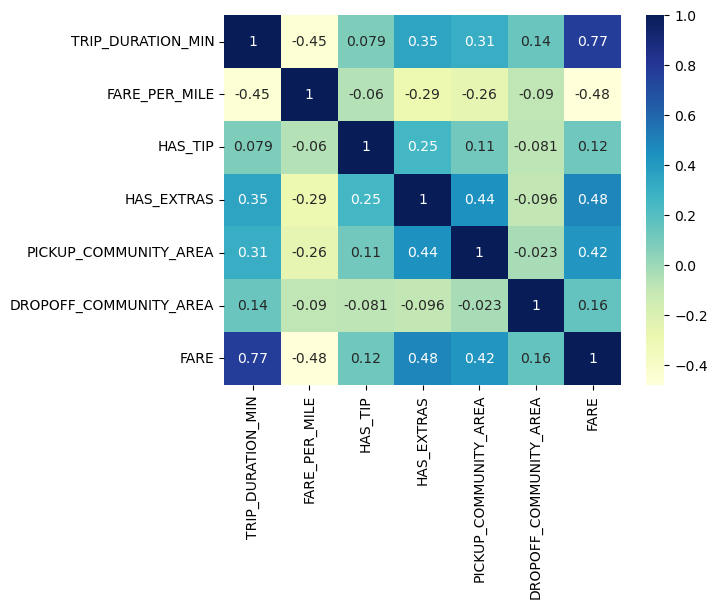

In [41]:
dataplot = sb.heatmap(new_data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

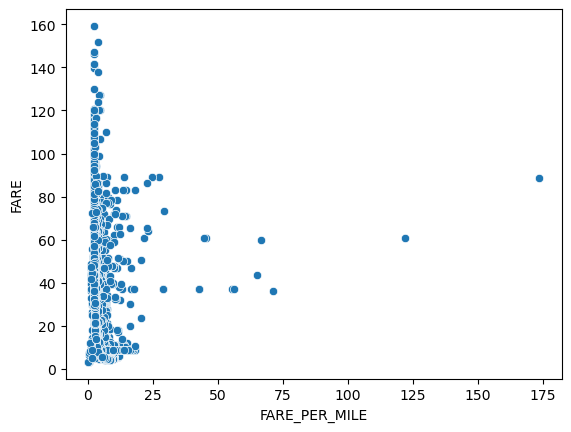

In [42]:
sb.scatterplot(x=new_data["FARE_PER_MILE"], y=new_data["FARE"])
plt.show()

#### the final dataset

In [43]:
new_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
TRIP_TIME_OF_DAY,morning,evening,evening,evening,evening,evening,evening,evening,evening,evening
TRIP_DURATION_MIN,30.0,15.0,15.0,60.0,30.0,30.0,30.0,30.0,0.87,15.0
DAY_TYPE,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday,Monday
PAYMENT_TYPE,Electronic,Electronic,Cash,Cash,Cash,Electronic,Cash,Electronic,Cash,Electronic
FARE_PER_MILE,12.447471,8.262712,7.945736,6.418919,8.695652,7.971014,7.25,7.195122,9.195402,11.535484
HAS_TIP,1,1,0,0,0,1,0,1,0,1
HAS_EXTRAS,0,1,0,1,0,0,0,1,1,0
PICKUP_COMMUNITY_AREA,8.0,8.0,32.0,32.0,32.0,8.0,8.0,8.0,8.0,32.0
DROPOFF_COMMUNITY_AREA,17.0,8.0,8.0,24.0,8.0,28.0,28.0,28.0,8.0,6.0
FARE,31.99,9.75,10.25,23.75,10.0,11.0,14.5,14.75,8.0,17.88


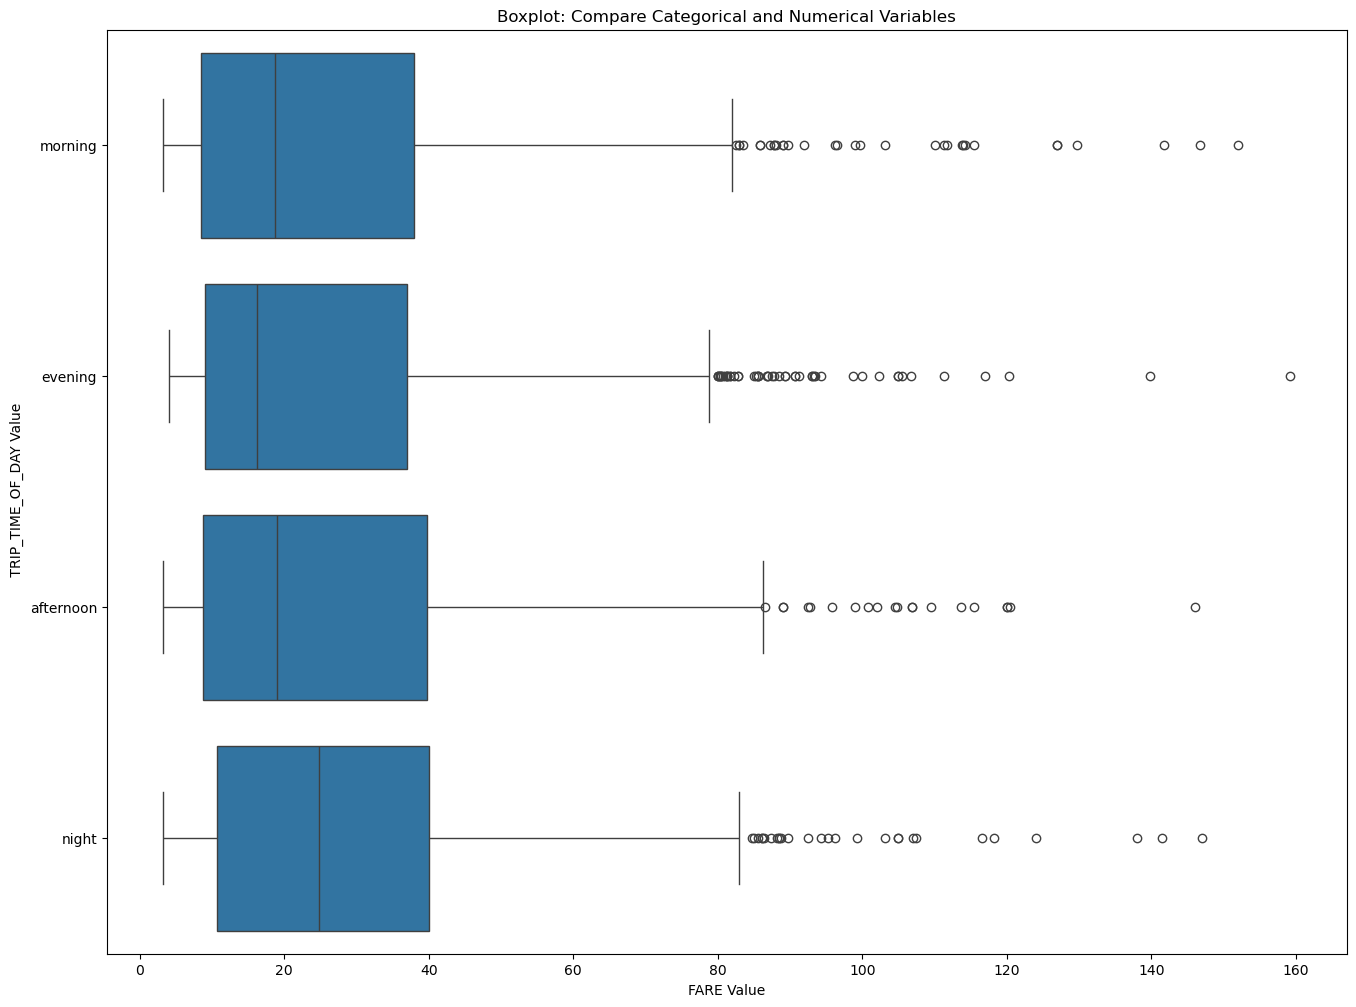

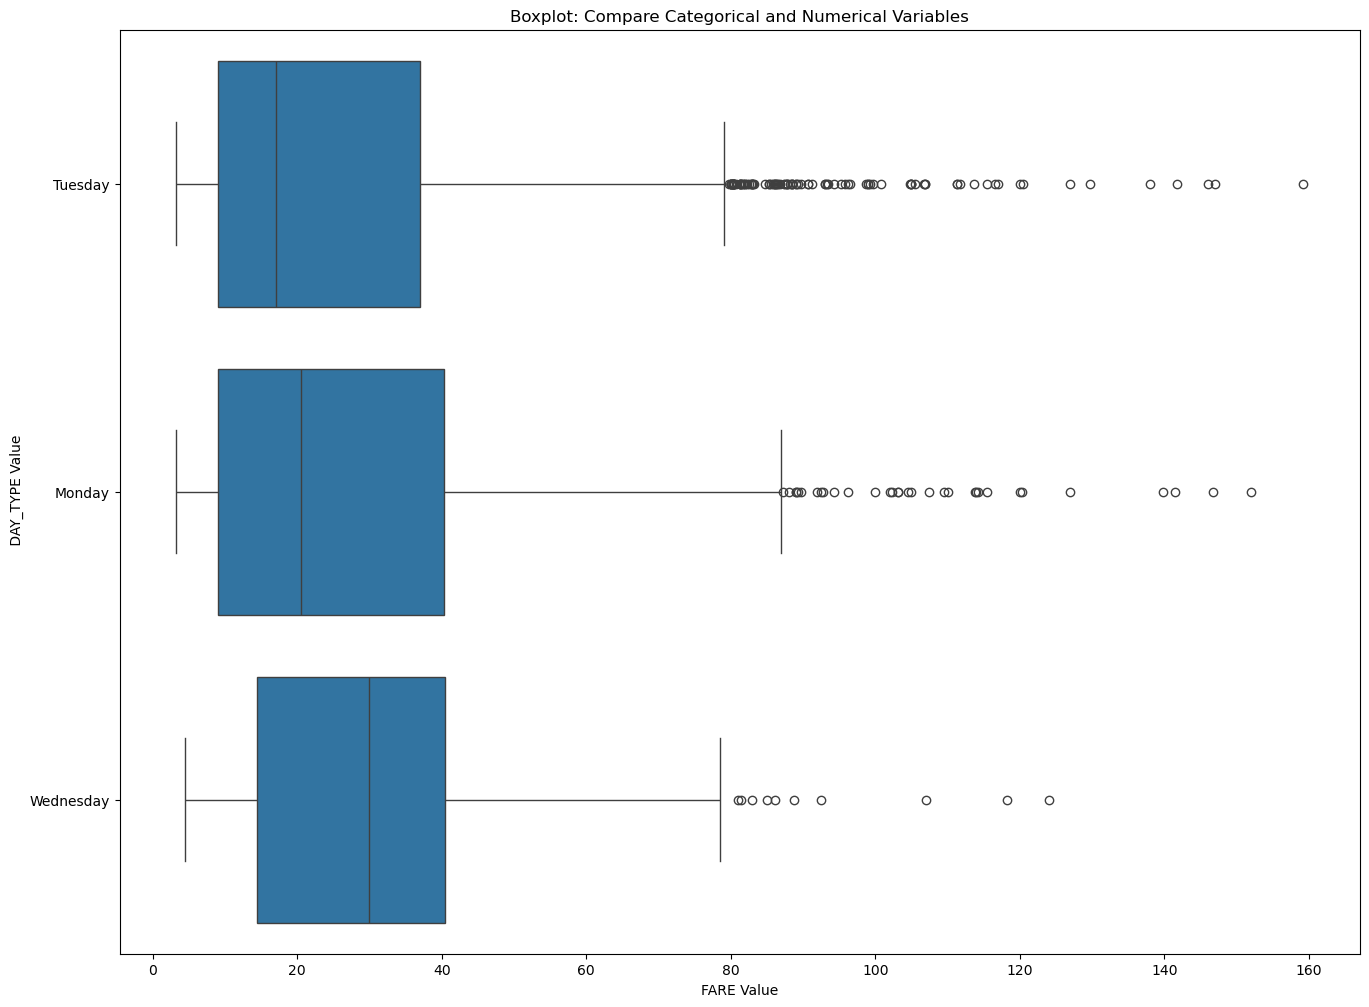

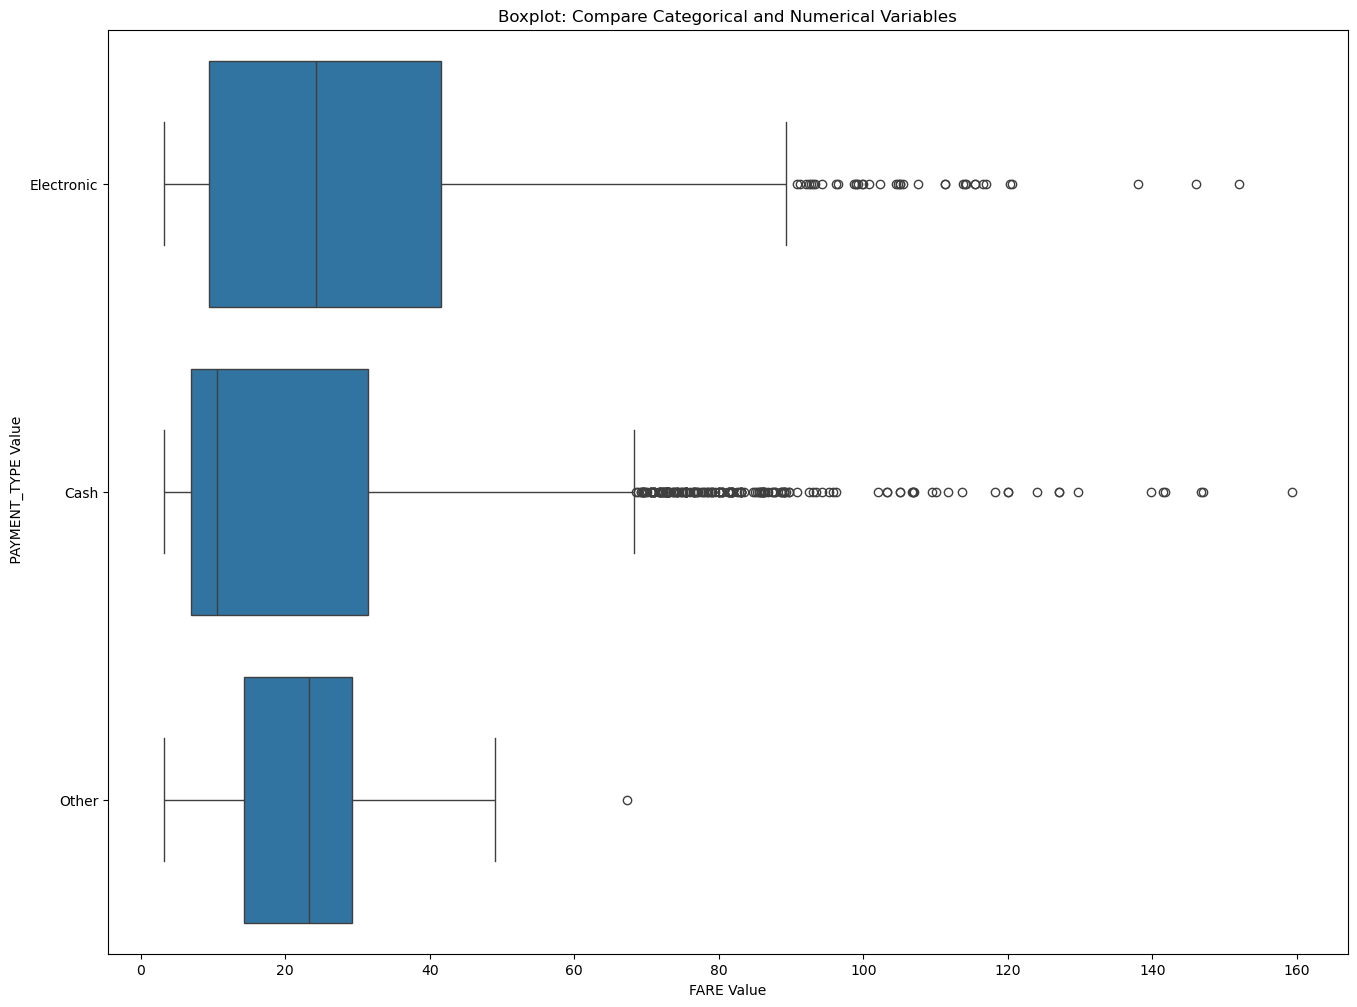

In [44]:
def BoxplotCategoricalVsNumerical(col1, col2, xlabel='Numerical', ylabel='Categorical'):
    plt.figure(figsize=(16, 12))
    sb.boxplot(x=col1, y=col2, data=new_data)
    plt.title("Boxplot: Compare Categorical and Numerical Variables")
    plt.xlabel(f'{xlabel} Value')
    plt.ylabel(f'{ylabel} Value')
    
    plt.show()


BoxplotCategoricalVsNumerical(new_data['FARE'], new_data['TRIP_TIME_OF_DAY'], 'FARE', ' TRIP_TIME_OF_DAY')
BoxplotCategoricalVsNumerical(new_data['FARE'], new_data['DAY_TYPE'], 'FARE', ' DAY_TYPE')
BoxplotCategoricalVsNumerical(new_data['FARE'], new_data['PAYMENT_TYPE'], 'FARE', ' PAYMENT_TYPE')

#### outliers will be handled in scaling section

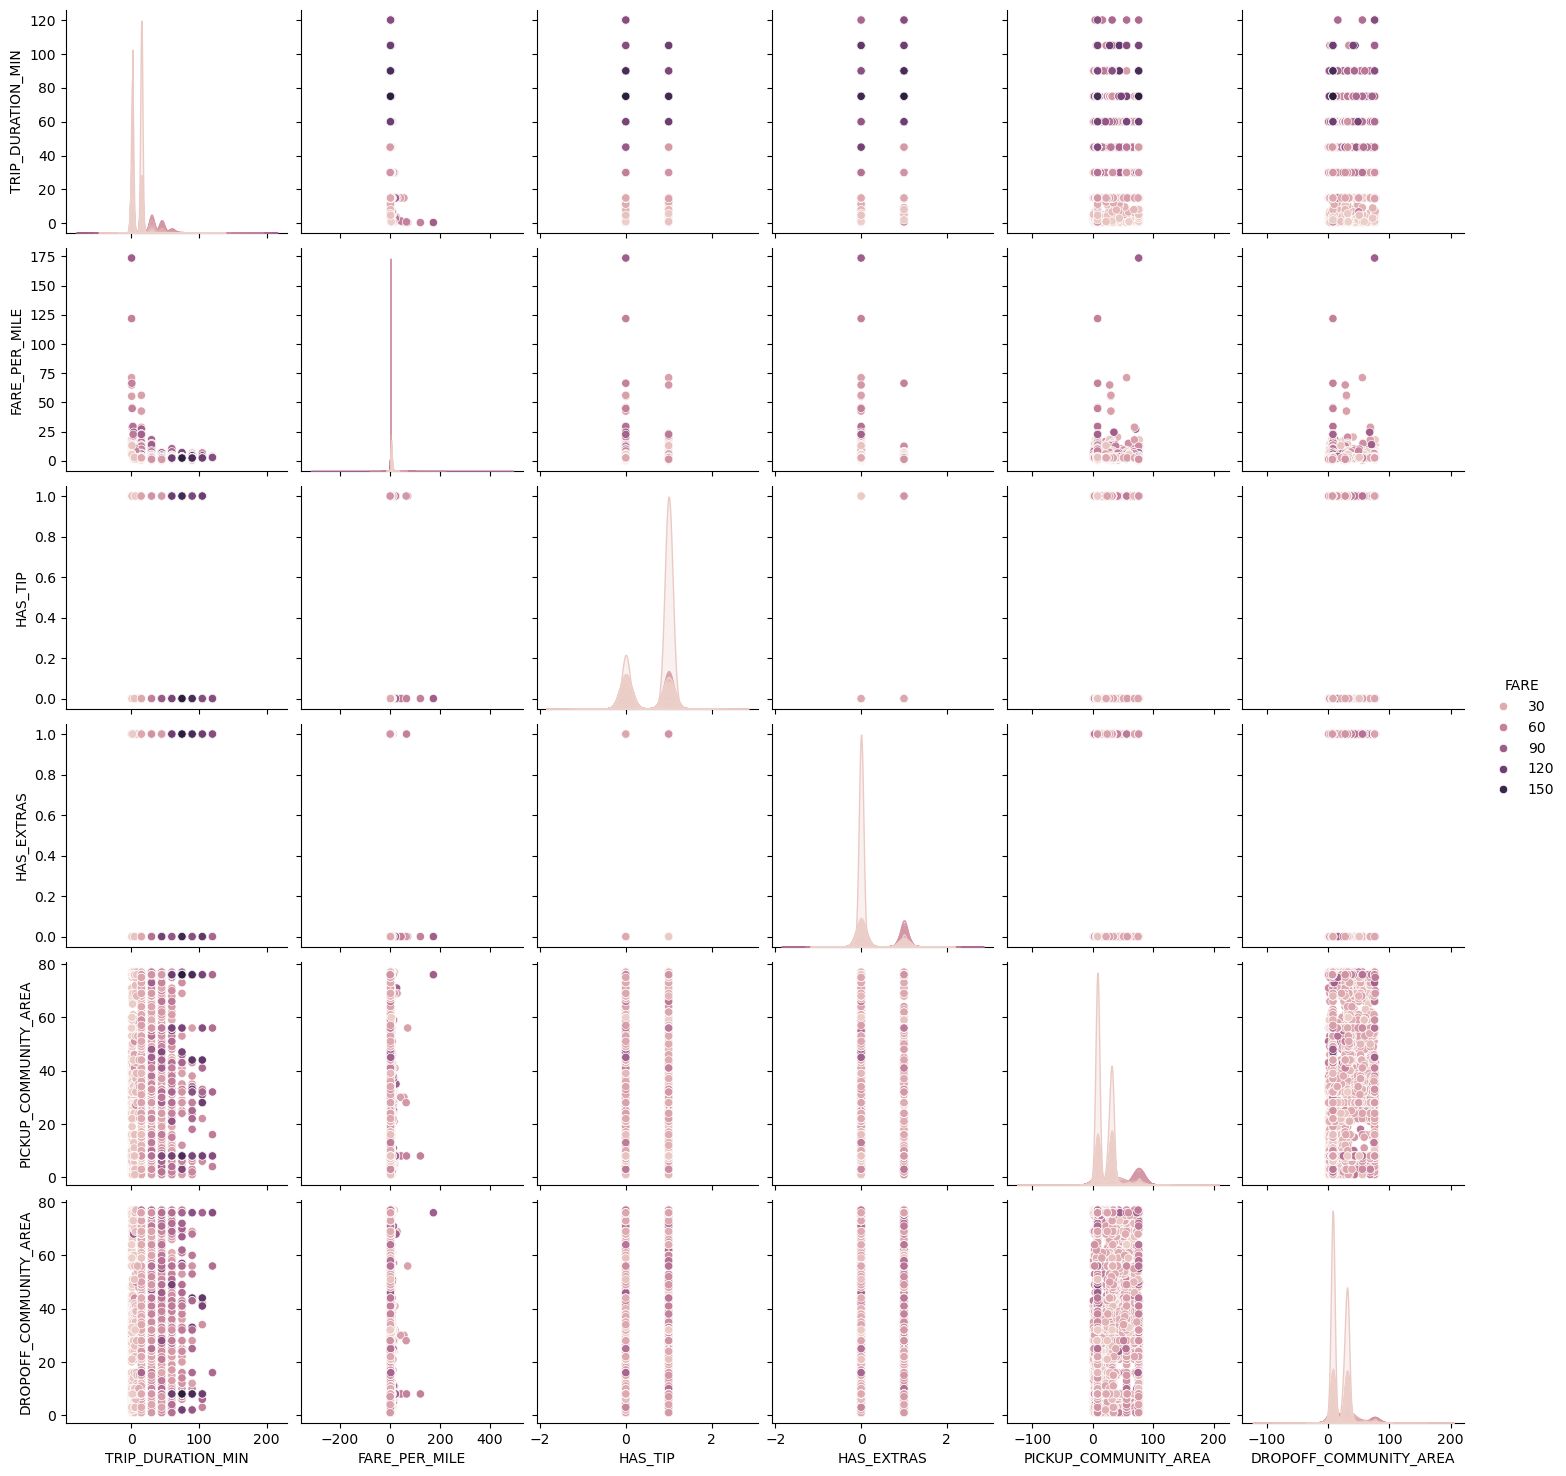

In [45]:
sb.pairplot(new_data, hue ='FARE')

In [46]:
new_data.to_csv('chicago_taxi_train_final_1.csv')

### convert categorical variable to numeric values

In [47]:
new_data.dtypes

TRIP_TIME_OF_DAY           object
TRIP_DURATION_MIN         float64
DAY_TYPE                   object
PAYMENT_TYPE               object
FARE_PER_MILE             float64
HAS_TIP                     int64
HAS_EXTRAS                  int64
PICKUP_COMMUNITY_AREA     float64
DROPOFF_COMMUNITY_AREA    float64
FARE                      float64
dtype: object

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(new_data[['TRIP_TIME_OF_DAY', 'DAY_TYPE', 'PAYMENT_TYPE']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['TRIP_TIME_OF_DAY', 'DAY_TYPE', 'PAYMENT_TYPE']))

new_data.drop(['TRIP_TIME_OF_DAY', 'DAY_TYPE', 'PAYMENT_TYPE'], axis=1, inplace=True)
new_data = pd.concat([new_data, encoded_df], axis=1)
new_data.dtypes

TRIP_DURATION_MIN           float64
FARE_PER_MILE               float64
HAS_TIP                       int64
HAS_EXTRAS                    int64
PICKUP_COMMUNITY_AREA       float64
DROPOFF_COMMUNITY_AREA      float64
FARE                        float64
TRIP_TIME_OF_DAY_evening    float64
TRIP_TIME_OF_DAY_morning    float64
TRIP_TIME_OF_DAY_night      float64
DAY_TYPE_Tuesday            float64
DAY_TYPE_Wednesday          float64
PAYMENT_TYPE_Electronic     float64
PAYMENT_TYPE_Other          float64
dtype: object

In [50]:
new_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
TRIP_DURATION_MIN,30.000000,15.000000,15.000000,60.000000,30.000000,30.000000,30.00,30.000000,0.870000,15.000000
FARE_PER_MILE,12.447471,8.262712,7.945736,6.418919,8.695652,7.971014,7.25,7.195122,9.195402,11.535484
HAS_TIP,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00,1.000000,0.000000,1.000000
HAS_EXTRAS,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00,1.000000,1.000000,0.000000
PICKUP_COMMUNITY_AREA,8.000000,8.000000,32.000000,32.000000,32.000000,8.000000,8.00,8.000000,8.000000,32.000000
DROPOFF_COMMUNITY_AREA,17.000000,8.000000,8.000000,24.000000,8.000000,28.000000,28.00,28.000000,8.000000,6.000000
FARE,31.990000,9.750000,10.250000,23.750000,10.000000,11.000000,14.50,14.750000,8.000000,17.880000
TRIP_TIME_OF_DAY_evening,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
TRIP_TIME_OF_DAY_morning,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
TRIP_TIME_OF_DAY_night,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


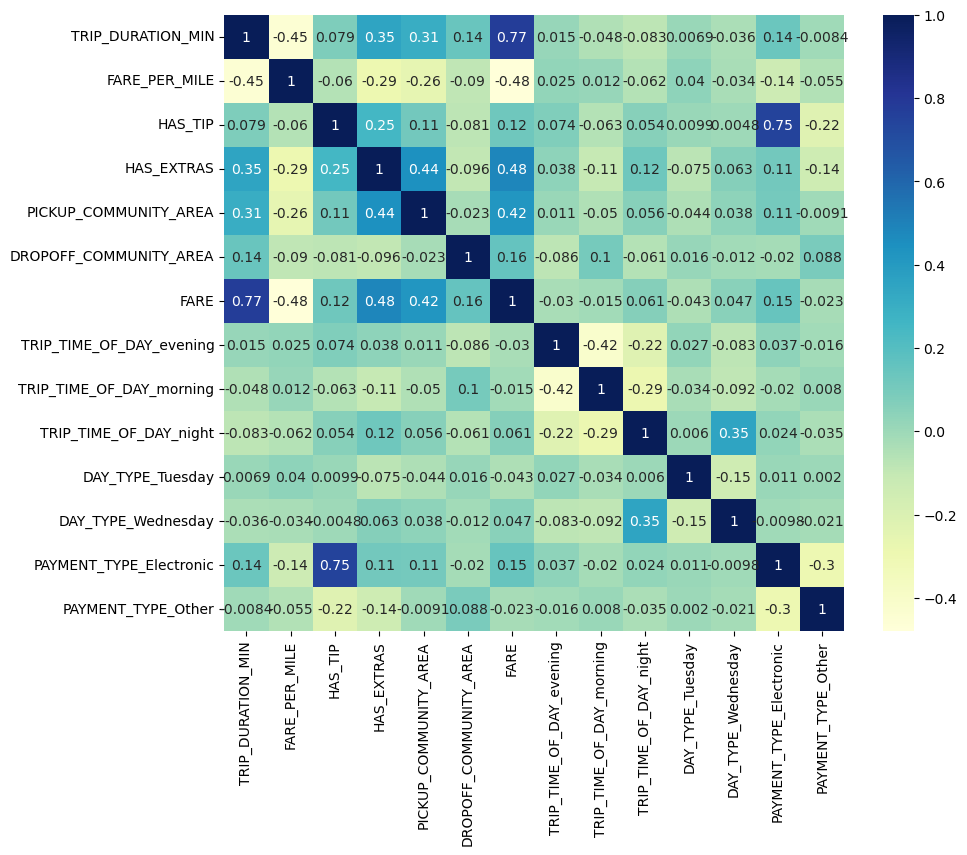

In [51]:
correlation_matrix = new_data.corr()
plt.figure(figsize=(10, 8))

dataplot = sb.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

Normalize or scale the data to improve performance if needed

In [76]:
new_data.to_csv('chicago_taxi_train_final_2.csv', index=False)
new_data.max()

TRIP_DURATION_MIN           120.000000
FARE_PER_MILE               173.588235
HAS_TIP                       1.000000
HAS_EXTRAS                    1.000000
PICKUP_COMMUNITY_AREA        77.000000
DROPOFF_COMMUNITY_AREA       77.000000
FARE                        159.250000
TRIP_TIME_OF_DAY_evening      1.000000
TRIP_TIME_OF_DAY_morning      1.000000
TRIP_TIME_OF_DAY_night        1.000000
DAY_TYPE_Tuesday              1.000000
DAY_TYPE_Wednesday            1.000000
PAYMENT_TYPE_Electronic       1.000000
PAYMENT_TYPE_Other            1.000000
dtype: float64

In [53]:
from sklearn.preprocessing import RobustScaler

cols_to_scale = ['TRIP_DURATION_MIN', 'FARE_PER_MILE', 'PICKUP_COMMUNITY_AREA', 
                'DROPOFF_COMMUNITY_AREA', 'FARE']

def robust_scale_remove_outliers(df, columns, k=1.5):
    df_clean = df.copy()
    scaler = RobustScaler()

    df_clean[columns] = scaler.fit_transform(df_clean[columns])
    
    for col in columns:
        q1 = np.percentile(df_clean[col], 25)
        q3 = np.percentile(df_clean[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - (k * iqr)
        upper_bound = q3 + (k * iqr)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean, scaler

cleaned_data, robust_scaler = robust_scale_remove_outliers(new_data, cols_to_scale)
cleaned_data.head(10).T

,1,2,4,5,6,7,15,16,17,18
TRIP_DURATION_MIN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000
FARE_PER_MILE,2.112068,1.980068,2.292359,1.990595,1.690339,1.667486,1.987242,1.040556,1.545568,0.764992
HAS_TIP,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
HAS_EXTRAS,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
PICKUP_COMMUNITY_AREA,-0.416667,0.083333,0.083333,-0.416667,-0.416667,-0.416667,0.083333,-0.416667,-0.416667,-0.416667
DROPOFF_COMMUNITY_AREA,-0.583333,-0.583333,-0.583333,0.250000,0.250000,0.250000,-0.583333,-0.583333,-0.583333,0.416667
FARE,-0.302521,-0.285714,-0.294118,-0.260504,-0.142857,-0.134454,-0.268908,-0.352941,0.058824,-0.327731
TRIP_TIME_OF_DAY_evening,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
TRIP_TIME_OF_DAY_morning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
TRIP_TIME_OF_DAY_night,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
len(cleaned_data), len(new_data)

(27178, 31694)

Split the dataset into training (80%) and testing (20%) sets.

In [55]:
from sklearn.model_selection import train_test_split

X = new_data.drop('FARE', axis=1)
y = new_data['FARE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Train the Model 🎯  

Train a **linear regression model** using `sklearn` (you can also try other alternatives).  

🔧 **Experiment with Different Features**  
- Start with a few features and observe the model's performance.  
- Try adding or removing features to see how it affects accuracy.  

> 🙋 **What are hyperparameters, and how do learning rate and epochs affect training** ❓

> 🙋 **Does using more features always improve the model** ❓

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6838961645630568

#### 🎉 Congratulations! 🎉

**🚀You’ve just trained your first Machine Learning model! 🚀**

### 4. Make Predictions 🔮  

Use the trained model to predict values on the **testing data**.  
Compare the predictions with the actual values to assess accuracy.  
You can also try making predictions on the **training data** to see how well the model memorized the patterns.  

>🙋 **Why doesn’t the model predict exact values, even when using the training data**❓

In [57]:
y_pred = lr.predict(X_test)
y_test_pred = lr.predict(X_train)
print(len(y_test_pred))
print(len(y_pred))

25355
6339


###5.Evaluate the Model 📊

Measure performance using metrics like MSE, RMSE, and R² Score.
Plot a loss curve to track training progress.
Create a scatter plot to compare actual vs. predicted values.

>🙋 **What do MSE, RMSE, and R² Score tell us about the model's performance**❓

>🙋 **How can you tell if your model is overfitting or underfitting**❓


In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def S(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Root Mean Square Error (RMSE): {rmse}")
    print(f"Mean Square Error (MSE): {mse}")
    print(f"Mean Absolute Error (MSE): {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 score (R^2): {r2_score(np.array(y_test).flatten(), np.array(y_pred).flatten())}")
S(y_test, y_pred)

Root Mean Square Error (RMSE): 9.669791586070797
Mean Square Error (MSE): 93.50486931804558
Mean Absolute Error (MSE): 6.840721806664365
R2 score (R^2): 0.6838961645630568


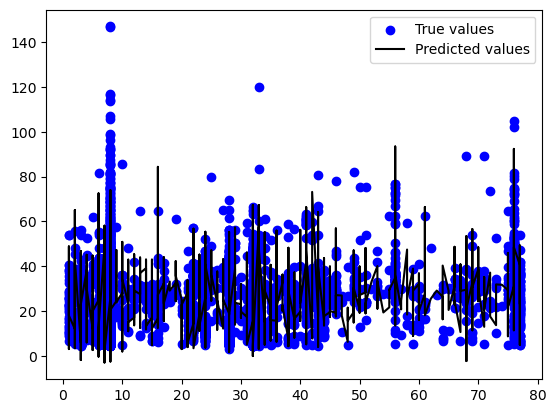

In [59]:
import matplotlib.pyplot as plt
import numpy as np

col = 5

sorted_idx = np.argsort(X_test.iloc[:, col])
sorted_X = X_test.iloc[sorted_idx, col]
sorted_y_pred = y_pred[sorted_idx]

plt.scatter(X_test.iloc[:, col], y_test, color='b', label='True values')
plt.plot(sorted_X, sorted_y_pred, color='k', label='Predicted values')
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

lr_1 = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

Grid_search = GridSearchCV(lr_1, param_grid, cv=5)
Grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {Grid_search.best_params_}")
print(f"Best Score: {Grid_search.best_score_}")

Best Hyperparameters: {'fit_intercept': False, 'positive': False}
Best Score: 0.6831773477755776


In [66]:
y_pred = Grid_search.predict(X_test)

In [68]:
S(y_test, y_pred)

Root Mean Square Error (RMSE): 9.742520622679832
Mean Square Error (MSE): 94.91670808334183
Mean Absolute Error (MSE): 6.904564179088273
R2 score (R^2): 0.679123283193524


In [75]:
def model_testing(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"Root Mean Square Error (RMSE): {rmse}")
    print(f"Mean Square Error (MSE): {mse}")
    print(f"Mean Absolute Error (MSE): {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 score (R^2): {r2_score(np.array(y_test).flatten(), np.array(y_pred).flatten())}")

l1r = LinearRegression(fit_intercept=False, positive=False, copy_X=True, n_jobs=5)
l1r.fit(X_train, y_train)
y_pred = l1r.predict(X_test)
# model_testing(y_test, y_pred)

print(X)
print(y)

       TRIP_DURATION_MIN  FARE_PER_MILE  HAS_TIP  HAS_EXTRAS  \
0                   30.0      12.447471        1           0   
1                   15.0       8.262712        1           1   
2                   15.0       7.945736        0           0   
3                   60.0       6.418919        0           1   
4                   30.0       8.695652        0           0   
...                  ...            ...      ...         ...   
31689               15.0       2.488515        0           0   
31690               30.0       1.440129        1           1   
31691               15.0       2.518428        0           0   
31692               45.0       1.140710        1           1   
31693               30.0       1.287466        1           1   

       PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA  \
0                        8.0                    17.0   
1                        8.0                     8.0   
2                       32.0                     8.0   
3      

In [61]:
S(y_test, y_pred)

Root Mean Square Error (RMSE): 9.669791586070797
Mean Square Error (MSE): 93.50486931804558
Mean Absolute Error (MSE): 6.840721806664365
R2 score (R^2): 0.6838961645630568


---
## Exercise 02 : **University Admission Prediction Challenge**

😇 I know that the exercise is difficult, but you will practice what you learned last week along with your first classification algorithm.

### 🎯 Objective

Your mission is to predict whether a student will be admitted to their desired university based on various academic and application-related factors. You’ll use **Logistic Regression** to build a predictive model and discuss its strengths and limitations.

📊 The Dataset  :

[Admission_Predict.csv](https://github.com/1337-Artificial-Intelligence/Entry-Level-ML-Engineer-Bootcamp/blob/main/Week02/Admission_Prediction_Challenge.csv)

The dataset contains information on **400 students** with the following attributes:

- **GRE Score** 🎓
- **TOEFL Score** 📚
- **University Rating** 🏛️
- **Statement of Purpose (SOP) Score** ✍️
- **Letter of Recommendation (LOR) Score** 📩
- **Cumulative Grade Point Average (CGPA)** 🎯
- **Research Experience (Yes/No)** 🔬
- **Chance of Admission (Target Variable: 0 or 1)**

### 🛠️ Steps to Follow

1. **Load & Explore the Data**: Understand the dataset, check for missing values, and analyze distributions.
2. **Feature Selection & Processing**: Identify relevant features and scale them if needed.
3. **Train a Logistic Regression Model**: Implement Logistic Regression (**from scratch** optional) to classify students into "Admitted" or "Not Admitted."
4. **Evaluate the Model**: Measure accuracy, precision, recall, and other key metrics.(do some reaserch 🙂)
5. **Discuss Limitations**: Explore cases where Logistic Regression may struggle and suggest improvements (e.g., feature engineering, alternative models).

### **Resources**  
[Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

### 🎨 Bonus: Visual Exploration

Use **histograms, correlation heatmaps, and scatter plots** to gain insights before modeling.

🔎 **Can you build a model that accurately predicts student admissions?** Let's find out! 🚀

In [28]:
Admission_Predict_df = pd.read_csv('Admission_Prediction_Challenge.csv')
Admission_Predict_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
Admission_Predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


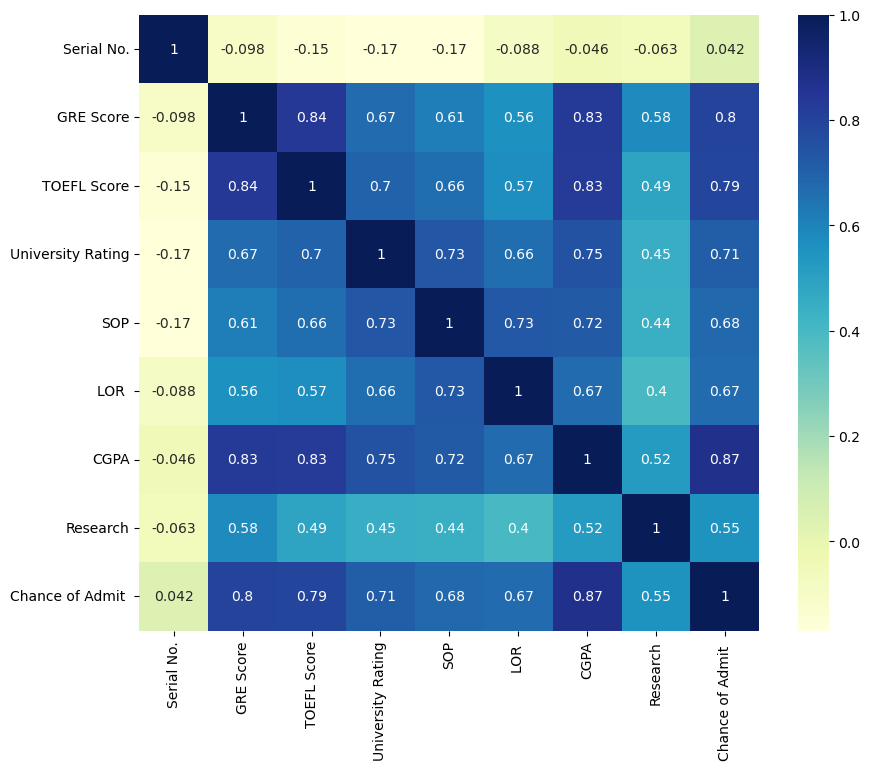

In [33]:
correlation_matrix = Admission_Predict_df.corr()
plt.figure(figsize=(10, 8))

dataplot = sb.heatmap(Admission_Predict_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [34]:
Admission_Predict_df.drop('Serial No.', axis='columns', inplace=True)

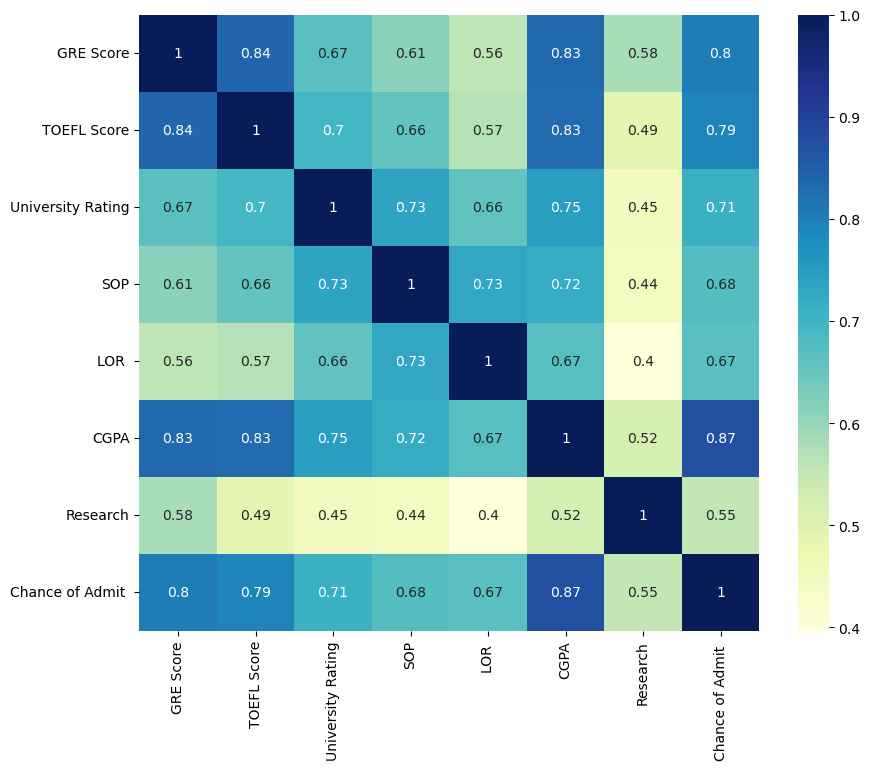

In [35]:
plt.figure(figsize=(10, 8))
dataplot = sb.heatmap(Admission_Predict_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

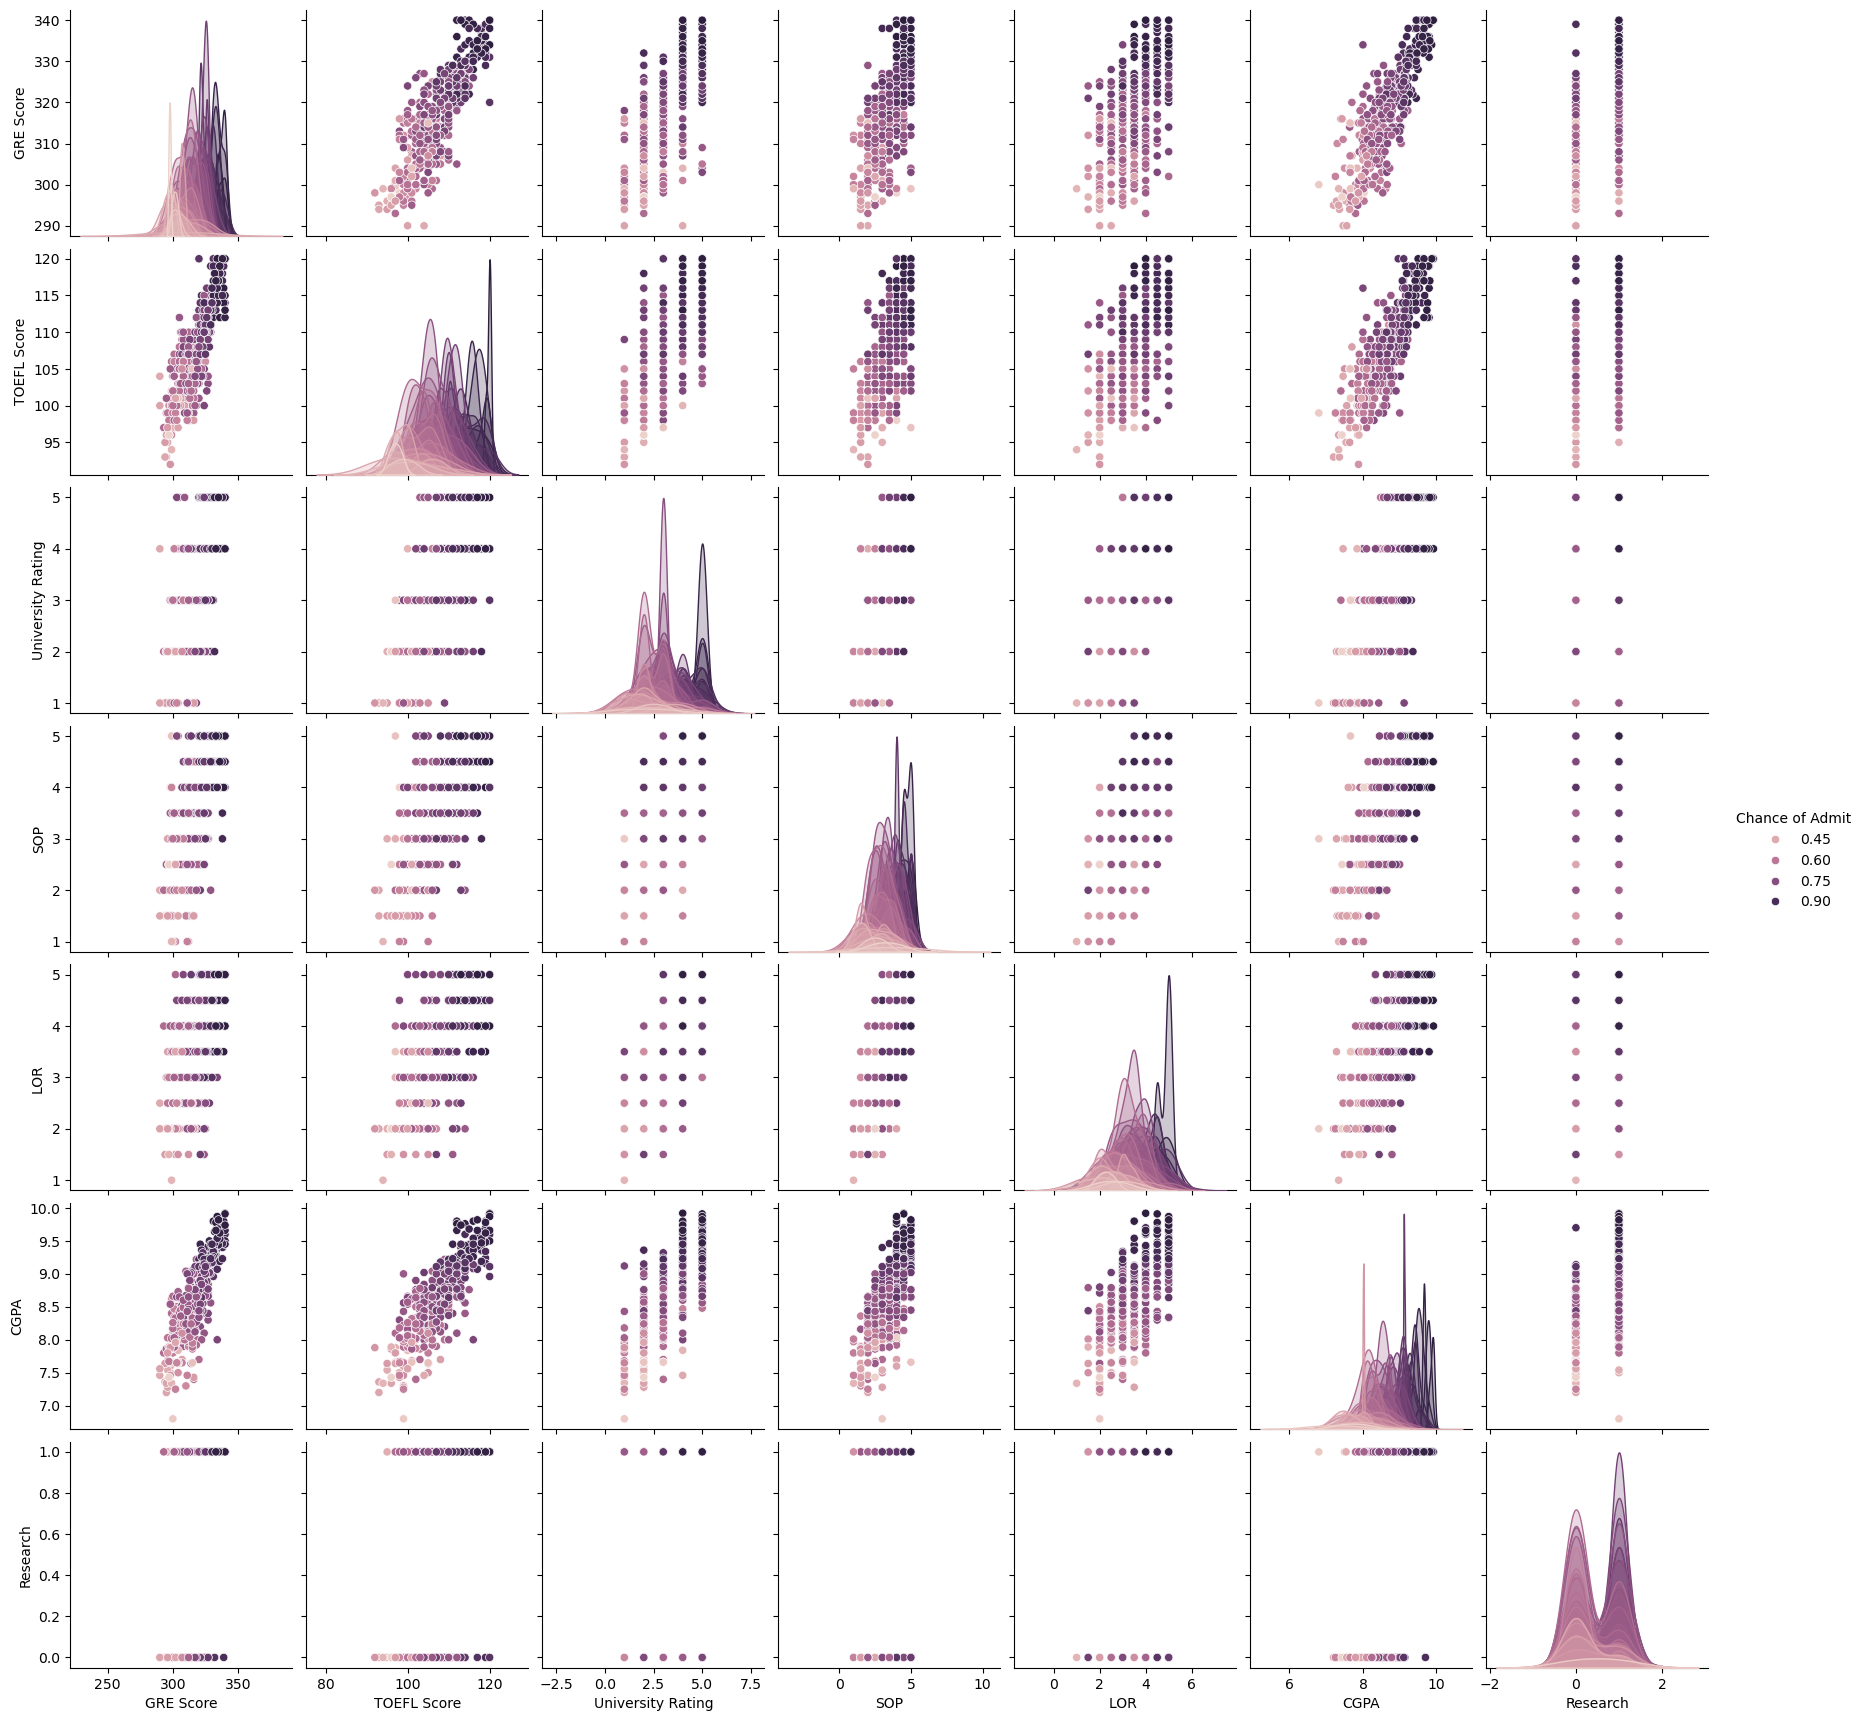

In [36]:
sb.pairplot(Admission_Predict_df, hue ='Chance of Admit ');

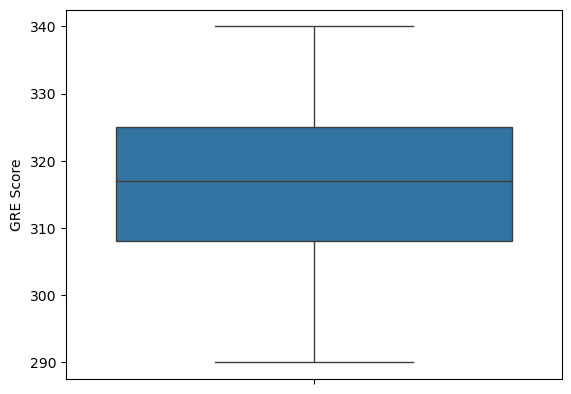

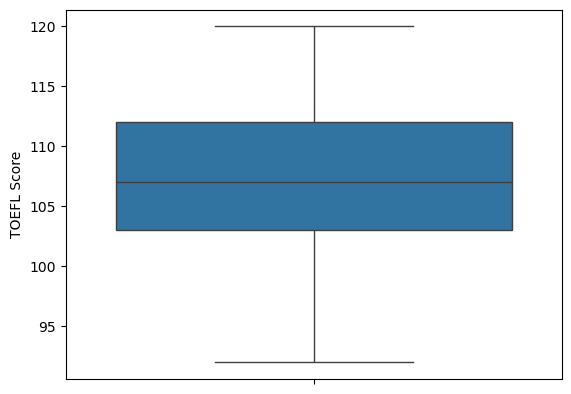

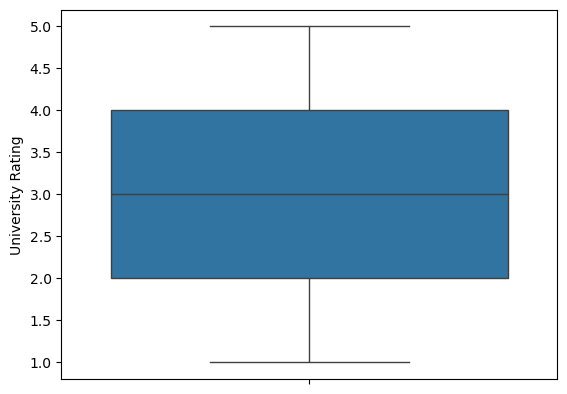

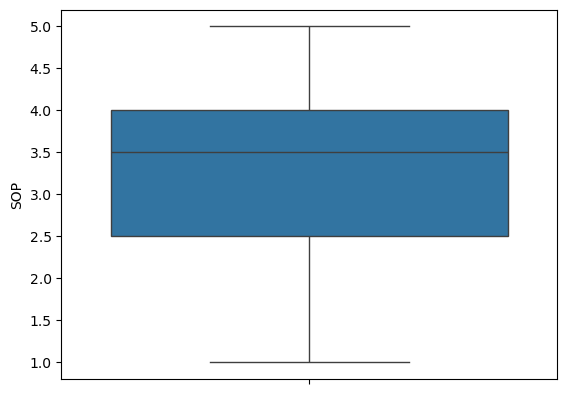

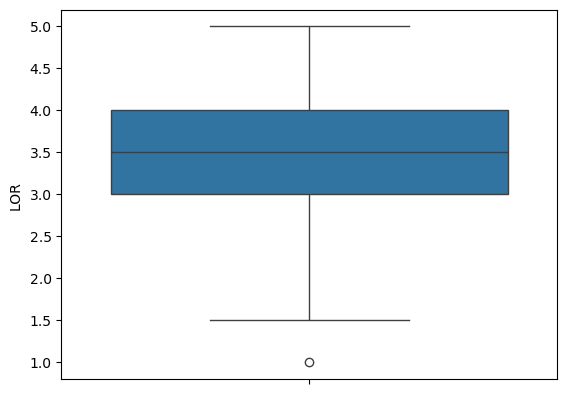

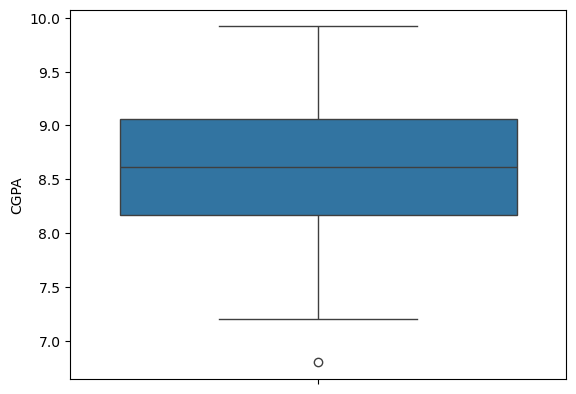

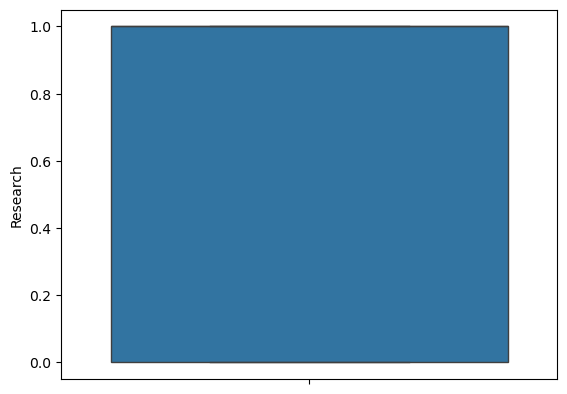

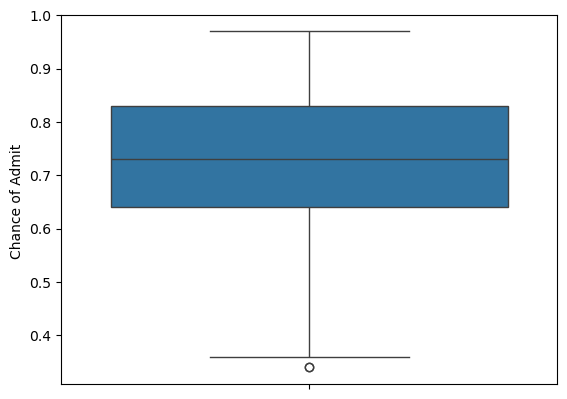

In [37]:
for col in Admission_Predict_df:
    sb.boxplot(data=Admission_Predict_df[col])
    plt.xticks(rotation=90)  # Rotate labels if many features
    plt.show()

In [38]:
Q1 = Admission_Predict_df.quantile(0.25)
Q3 = Admission_Predict_df.quantile(0.75)
IQR = Q3 - Q1

Admission_Predict_df_cleaned = Admission_Predict_df[~((Admission_Predict_df < (Q1 - 1.5 * IQR)) | (Admission_Predict_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
len(Admission_Predict_df_cleaned)

396

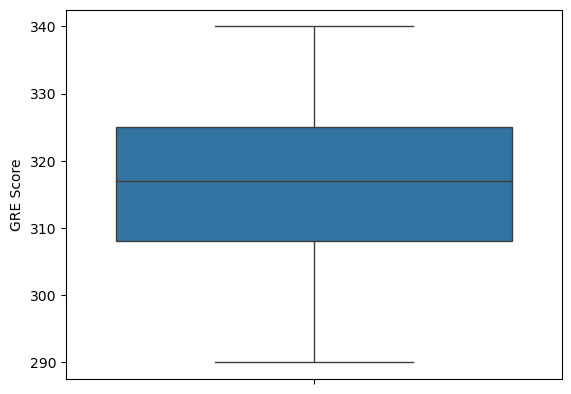

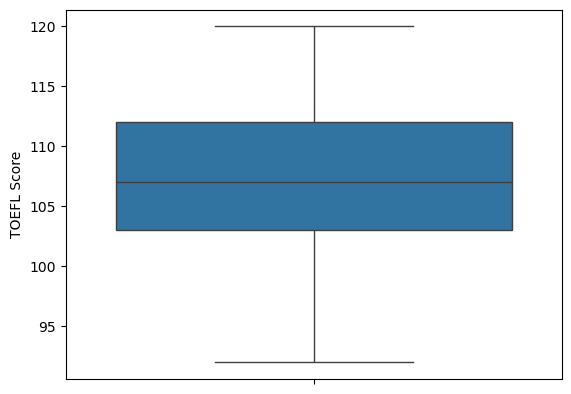

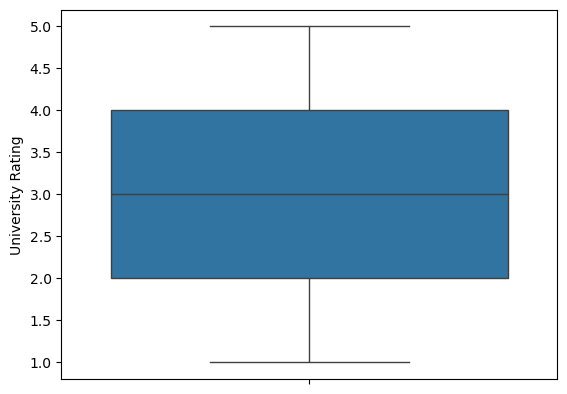

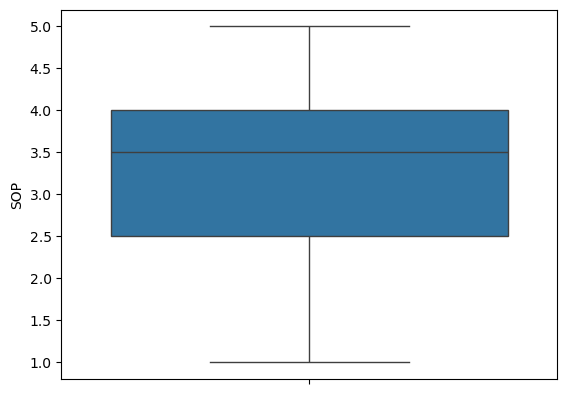

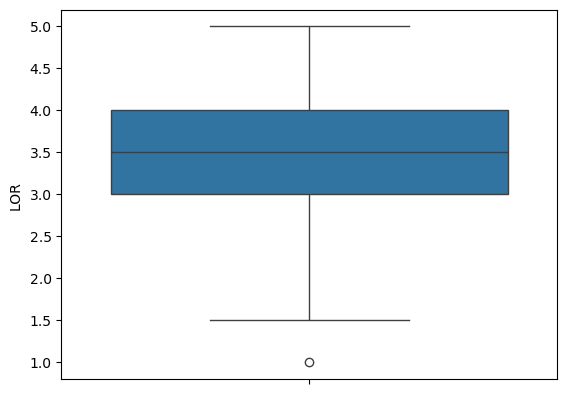

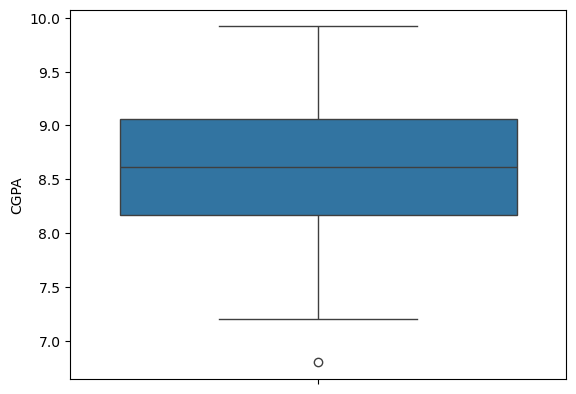

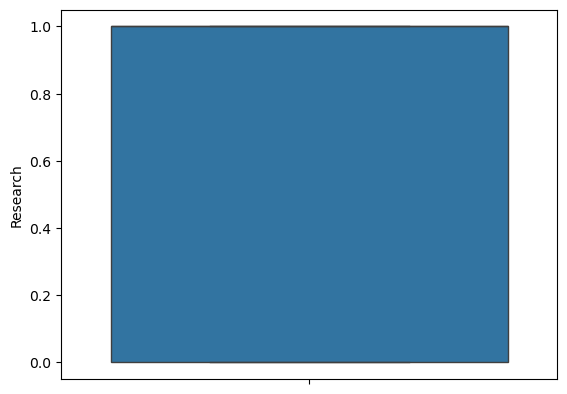

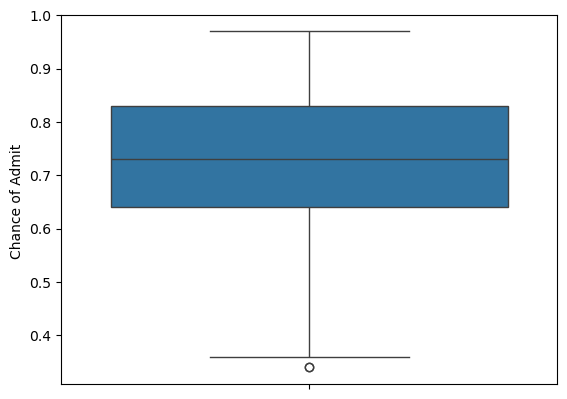

In [40]:
for col in Admission_Predict_df_cleaned:
    sb.boxplot(data=Admission_Predict_df[col])
    plt.xticks(rotation=90)  # Rotate labels if many features
    plt.show()

In [41]:
print("1. Admission_Predict_df: ", len(Admission_Predict_df[Admission_Predict_df['Chance of Admit '] > 0.5]))
print("2. Admission_Predict_df: ", len(Admission_Predict_df[Admission_Predict_df['Chance of Admit '] <= 0.5]))
print("1. Admission_Predict_df_cleaned: ", len(Admission_Predict_df_cleaned[Admission_Predict_df_cleaned['Chance of Admit '] > 0.5]))
print("2. Admission_Predict_df_cleaned: ", len(Admission_Predict_df_cleaned[Admission_Predict_df_cleaned['Chance of Admit '] <= 0.5]))

1. Admission_Predict_df:  365
2. Admission_Predict_df:  35
1. Admission_Predict_df_cleaned:  365
2. Admission_Predict_df_cleaned:  31


In [43]:
Admission_Predict_df_cleaned.max(), Admission_Predict_df_cleaned.min()

(GRE Score            340.00
 TOEFL Score          120.00
 University Rating      5.00
 SOP                    5.00
 LOR                    5.00
 CGPA                   9.92
 Research               1.00
 Chance of Admit        0.97
 dtype: float64,
 GRE Score            290.00
 TOEFL Score           92.00
 University Rating      1.00
 SOP                    1.00
 LOR                    1.50
 CGPA                   7.20
 Research               0.00
 Chance of Admit        0.36
 dtype: float64)

In [88]:
Admission_Predict_df_cleaned.to_csv("Admission_Predict_df_cleaned.csv", index=False)

In [92]:
from sklearn.model_selection import train_test_split

X = Admission_Predict_df.drop('Chance of Admit ', axis=1)
y = Admission_Predict_df['Chance of Admit ']

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print("Min y_train_: ", np.min(y_train_))
print("Max y_train_: ", np.max(y_train_))

print("Min y_test_: ", np.min(y_test_))
print("Max y_test_: ", np.max(y_test_))


Min y_train_:  0.34
Max y_train_:  0.97
Min y_test_:  0.34
Max y_test_:  0.96


In [98]:
threshold = 0.65
y = (y < threshold).astype(int)
y_train_ = (y_train_ < threshold).astype(int)
y_test_ = (y_test_ < threshold).astype(int)

print("Count of class 0 (False):", np.sum(y_train_ == 0))
print("Count of class 1 (True):", np.sum(y_train_ == 1))

print("Test set class 0 count:", np.sum(y_test_ == 0))
print("Test set class 1 count:", np.sum(y_test_ == 1))



Count of class 0 (False): 87
Count of class 1 (True): 233
Test set class 0 count: 26
Test set class 1 count: 54


In [99]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train_, y_train_)
model.score(X_test_, y_test_)


0.825

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear')

param_grid = {
    'C': [0.1, 1],
    'max_iter': [300, 400, 500, 1000, 2000, 3000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train_, y_train_)

print("Best parameters found by GridSearchCV: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

score = best_model.score(X_test_, y_test_)
print(f"Test set accuracy: {score}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best parameters found by GridSearchCV:  {'C': 1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Test set accuracy: 0.825


/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ksohail-/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

In [101]:
X_train_

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [102]:
model = LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear')

In [102]:
from sklearn.model_selection import cross_val_score
model_acc = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                        scoring="accuracy").mean()

model_precision = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                        scoring="precision").mean()

model_recall = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                        scoring="recall").mean()

model_f1 = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                        scoring="f1").mean()

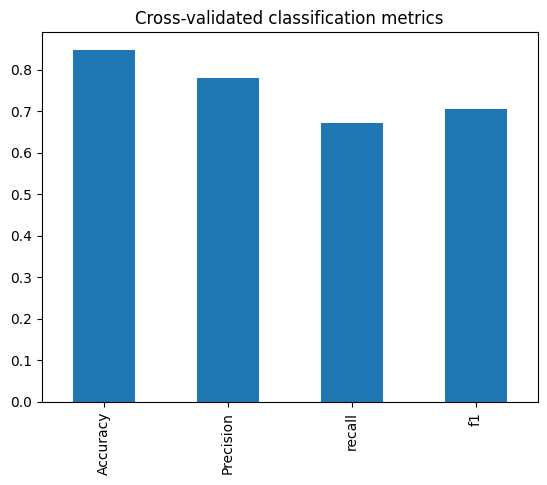

In [103]:
cv_metrics = pd.DataFrame({"Accuracy": model_acc,
                           "Precision": model_precision,
                           "recall": model_recall,
                           "f1": model_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

---
##🎉 **Congratulations!** 🎉  

You've successfully trained your first **Linear Regression** and **Logistic Regression** models! 🚀  

Through this journey, you've learned:  
✅ How to **prepare and preprocess data** for training.  
✅ The importance of **choosing the right features** and tuning **hyperparameters**.  
✅ How to **train, predict, and evaluate models** using key metrics.  
✅ The difference between **regression (predicting continuous values)** and **classification (predicting categories)**.  

This is a **big step** in your Machine Learning journey! 💡 But ML is much more than just linear and logistic regression—there are many other models and techniques to explore.  

🔎 **Next Challenge:**  
- Research other **types of ML models** (e.g., Decision Trees, SVMs, Neural Networks).  
- Try solving different **real-world problems** using what you've learned.  

👏 Keep experimenting, keep learning, and welcome to the world of Machine Learning! 🚀🔥